<a href="https://colab.research.google.com/github/SDGPTeamX/PregRed/blob/ml_Somaskaran/Pregred_Somaskaran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Remove columns with single values

In [2]:
# summarize the number of unique values for each column using numpy
import pandas as pd
# define the location of the dataset
from google.colab import drive
drive.mount('/content/gdrive')
path= '/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/TeamX_Modified_Dataset.csv'
# load the dataset
df = pd.read_csv(path)
# summarize the number of unique values in each column
counts = df.nunique()
print(counts)

Mounted at /content/gdrive
Age                         32
Gravidity                    7
Consanguinity                2
Rubella Immunization         2
Had Folic Acid               2
Subfertility                 2
Blood_Pressure               4
Height                      95
BMI                        219
Cardiac Diseases             2
Thyroid Diseases             2
Renal Diseases               1
Venereal Diseases            1
Malaria                      1
HIV                          1
Blood Sugar                128
Haemoglobin                 70
Is the newborn healthy?      2
dtype: int64


In [3]:
df

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Renal Diseases,Venereal Diseases,Malaria,HIV,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,No,No,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,No,No,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,No,No,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,No,No,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,No,No,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,No,No,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,No,No,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,No,No,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,No,No,No,No,101.0,12.8,No


In [4]:
# delete columns with a single unique value
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(to_del)
# drop useless columns
df.drop(df.columns[to_del], axis=1, inplace=True)
print(df.shape)

[11, 12, 13, 14]
(2038, 14)


In [5]:
df

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,101.0,12.8,No


In [6]:
df.to_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Modified_Remove_Single_Values.csv', index=False)

In [7]:
df2 = pd.read_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Modified_Remove_Single_Values.csv')
df2

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,98.0,11.9,No
2034,23,1,No,Yes,No,No,N,156.5,22.2,No,No,100.0,12.0,No
2035,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,90.0,11.4,No
2036,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,101.0,12.8,No


# Remove duplicated rows

In [8]:
# locate rows of duplicate data
# calculate duplicates
dups = df2.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df2[dups])

True
      Age  Gravidity  ... Haemoglobin Is the newborn healthy?
268    22          1  ...        11.0                     Yes
495    33          1  ...         NaN                      No
553    26          2  ...        11.0                     Yes
702    32          2  ...        13.8                     Yes
709    30          2  ...        11.7                     Yes
720    22          1  ...        11.2                     Yes
756    29          2  ...        12.7                     Yes
1692   35          2  ...        11.9                      No
1735   25          1  ...         NaN                      No
1758   34          1  ...         NaN                      No

[10 rows x 14 columns]


In [9]:
# delete rows of duplicate data from the dataset
print(df2.shape)
# delete duplicate rows
df2.drop_duplicates(inplace=True)
print(df2.shape)

(2038, 14)
(2028, 14)


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2028 entries, 0 to 2037
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2028 non-null   int64  
 1   Gravidity                2028 non-null   int64  
 2   Consanguinity            2026 non-null   object 
 3   Rubella Immunization     2025 non-null   object 
 4   Had Folic Acid           2024 non-null   object 
 5   Subfertility             2027 non-null   object 
 6   Blood_Pressure           1992 non-null   object 
 7   Height                   1980 non-null   float64
 8   BMI                      1983 non-null   float64
 9   Cardiac Diseases         2028 non-null   object 
 10  Thyroid Diseases         2028 non-null   object 
 11  Blood Sugar              1855 non-null   float64
 12  Haemoglobin              1860 non-null   float64
 13  Is the newborn healthy?  2028 non-null   object 
dtypes: float64(4), int64(2),

In [11]:
df2.describe()

,Age,Gravidity,Height,BMI,Blood Sugar,Haemoglobin
count,2028.000000,2028.000000,1980.000000,1983.000000,1855.000000,1860.000000
mean,29.058185,2.135602,154.123788,22.456011,95.158383,11.573844
std,5.690294,1.139875,6.004279,4.379197,16.693485,4.365603
min,14.000000,1.000000,69.500000,10.000000,22.000000,7.200000
25%,25.000000,1.000000,150.000000,19.200000,84.000000,10.600000
50%,29.000000,2.000000,154.000000,22.000000,94.000000,11.400000
75%,33.000000,3.000000,158.000000,25.000000,102.000000,12.200000
max,46.000000,7.000000,178.000000,43.500000,196.000000,133.000000


In [12]:
df2.to_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Modified_Remove_Duplicated_Rows.csv', index=False)
df3 = pd.read_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Modified_Remove_Duplicated_Rows.csv')
df3

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.0,23.4,No,No,135.0,12.0,Yes
1,14,1,No,Yes,No,No,N,159.0,NaN,No,No,73.5,11.2,Yes
2,24,2,No,Yes,Yes,No,N,153.0,18.3,No,No,90.0,10.0,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.0,18.4,No,No,NaN,NaN,No
4,30,2,No,Yes,Yes,No,N,152.0,18.4,No,No,90.0,9.7,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.0,23.2,No,No,98.0,11.9,No
2024,23,1,No,Yes,No,No,N,156.5,22.2,No,No,100.0,12.0,No
2025,33,2,No,Yes,Yes,No,N,150.0,23.6,No,No,90.0,11.4,No
2026,26,2,No,Yes,Yes,No,N,154.5,23.4,No,No,101.0,12.8,No


# Replace missing values

In [13]:
df3_mean=df3.mean(axis=0)
print(df3_mean)

Age             29.058185
Gravidity        2.135602
Height         154.123788
BMI             22.456011
Blood Sugar     95.158383
Haemoglobin     11.573844
dtype: float64


In [14]:
df3 = df3.fillna(df3_mean, axis=0)
df3

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [15]:
df3.to_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Modified_Replace_Missing_Values.csv', index=False)
df4 = pd.read_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Modified_Replace_Missing_Values.csv')
df4

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [16]:
df4_mode = df4.mode(axis=0, numeric_only=False, dropna=True)
df4_mode

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,29,1,No,Yes,Yes,No,N,150.0,20.0,No,No,95.158383,11.573844,Yes


In [17]:
f4_mode = df4.mode(axis=0, numeric_only=False, dropna=True)
print(df4_mode)
df4 = df4.fillna(df4_mode.iloc[0], axis=0)
df4

   Age  Gravidity  ... Haemoglobin Is the newborn healthy?
0   29          1  ...   11.573844                     Yes

[1 rows x 14 columns]


,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


In [18]:
df4.to_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_PregRed_Cleaned_Dataset.csv', index=False)
df5 = pd.read_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_PregRed_Cleaned_Dataset.csv')
df5

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No


# Changing Categorical variables to numeric

In [25]:
df5 ['BP_numeric'] =df5.Blood_Pressure.map({'N':0,'HBP1':0.75,'HBP2':1,'E':0.5})
df5

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Blood_Pressure,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?,BP_numeric
0,30,3,No,No,No,No,N,149.000000,23.400000,No,No,135.000000,12.000000,Yes,0.00
1,14,1,No,Yes,No,No,N,159.000000,22.456011,No,No,73.500000,11.200000,Yes,0.00
2,24,2,No,Yes,Yes,No,N,153.000000,18.300000,No,No,90.000000,10.000000,Yes,0.00
3,34,2,No,Yes,Yes,No,HBP1,153.000000,18.400000,No,No,95.158383,11.573844,No,0.75
4,30,2,No,Yes,Yes,No,N,152.000000,18.400000,No,No,90.000000,9.700000,Yes,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,N,161.000000,23.200000,No,No,98.000000,11.900000,No,0.00
2024,23,1,No,Yes,No,No,N,156.500000,22.200000,No,No,100.000000,12.000000,No,0.00
2025,33,2,No,Yes,Yes,No,N,150.000000,23.600000,No,No,90.000000,11.400000,No,0.00
2026,26,2,No,Yes,Yes,No,N,154.500000,23.400000,No,No,101.000000,12.800000,No,0.00


In [26]:
df5.BP_numeric.value_counts()

0.00    1639
0.75     254
0.50      95
1.00      40
Name: BP_numeric, dtype: int64

In [27]:
df5.drop('Blood_Pressure',
  axis='columns', inplace=True)
df5

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?,BP_numeric
0,30,3,No,No,No,No,149.000000,23.400000,No,No,135.000000,12.000000,Yes,0.00
1,14,1,No,Yes,No,No,159.000000,22.456011,No,No,73.500000,11.200000,Yes,0.00
2,24,2,No,Yes,Yes,No,153.000000,18.300000,No,No,90.000000,10.000000,Yes,0.00
3,34,2,No,Yes,Yes,No,153.000000,18.400000,No,No,95.158383,11.573844,No,0.75
4,30,2,No,Yes,Yes,No,152.000000,18.400000,No,No,90.000000,9.700000,Yes,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,161.000000,23.200000,No,No,98.000000,11.900000,No,0.00
2024,23,1,No,Yes,No,No,156.500000,22.200000,No,No,100.000000,12.000000,No,0.00
2025,33,2,No,Yes,Yes,No,150.000000,23.600000,No,No,90.000000,11.400000,No,0.00
2026,26,2,No,Yes,Yes,No,154.500000,23.400000,No,No,101.000000,12.800000,No,0.00


In [28]:
df5 = df5[['Age', 'Gravidity', 'Consanguinity', 'Rubella Immunization', 'Had Folic Acid', 
           'Subfertility', 'BP_numeric','Height', 'BMI', 'Cardiac Diseases','Thyroid Diseases', 'Blood Sugar', 'Haemoglobin', 'Is the newborn healthy?']]
df5

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,BP_numeric,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,0.00,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,0.00,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,0.00,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,0.75,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,0.00,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,0.00,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,0.00,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,0.00,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,0.00,154.500000,23.400000,No,No,101.000000,12.800000,No


In [29]:
df5.to_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_CATtoNUM_Dataset.csv', index=False)
df6 = pd.read_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_CATtoNUM_Dataset.csv')
df6

,Age,Gravidity,Consanguinity,Rubella Immunization,Had Folic Acid,Subfertility,BP_numeric,Height,BMI,Cardiac Diseases,Thyroid Diseases,Blood Sugar,Haemoglobin,Is the newborn healthy?
0,30,3,No,No,No,No,0.00,149.000000,23.400000,No,No,135.000000,12.000000,Yes
1,14,1,No,Yes,No,No,0.00,159.000000,22.456011,No,No,73.500000,11.200000,Yes
2,24,2,No,Yes,Yes,No,0.00,153.000000,18.300000,No,No,90.000000,10.000000,Yes
3,34,2,No,Yes,Yes,No,0.75,153.000000,18.400000,No,No,95.158383,11.573844,No
4,30,2,No,Yes,Yes,No,0.00,152.000000,18.400000,No,No,90.000000,9.700000,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,22,1,No,Yes,Yes,Yes,0.00,161.000000,23.200000,No,No,98.000000,11.900000,No
2024,23,1,No,Yes,No,No,0.00,156.500000,22.200000,No,No,100.000000,12.000000,No
2025,33,2,No,Yes,Yes,No,0.00,150.000000,23.600000,No,No,90.000000,11.400000,No
2026,26,2,No,Yes,Yes,No,0.00,154.500000,23.400000,No,No,101.000000,12.800000,No


In [36]:
pd.options.display.float_format = '{:,.3f}'.format
df7=pd.read_csv('/content/gdrive/MyDrive/SDG_ML_DATASET_11_03_2021/Colabs_Nominaltobinary_converted_Dataset.csv')
df7


,Age,Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes',Subfertility=Yes,BP_numeric,Height,BMI,'Cardiac Diseases=Yes','Thyroid Diseases=Yes','Blood Sugar',Haemoglobin,'Is the newborn healthy?=Yes'
0,0.500,0.333,0,0,0,0,0.000,0.733,0.400,0,0,0.649,0.038,1
1,0.000,0.000,0,1,0,0,0.000,0.825,0.372,0,0,0.296,0.032,1
2,0.312,0.167,0,1,1,0,0.000,0.770,0.248,0,0,0.391,0.022,1
3,0.625,0.167,0,1,1,0,0.750,0.770,0.251,0,0,0.420,0.035,0
4,0.500,0.167,0,1,1,0,0.000,0.760,0.251,0,0,0.391,0.020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,0.250,0.000,0,1,1,1,0.000,0.843,0.394,0,0,0.437,0.037,0
2024,0.281,0.000,0,1,0,0,0.000,0.802,0.364,0,0,0.448,0.038,0
2025,0.594,0.167,0,1,1,0,0.000,0.742,0.406,0,0,0.391,0.033,0
2026,0.375,0.167,0,1,1,0,0.000,0.783,0.400,0,0,0.454,0.045,0


In [37]:
df7.corr()

,Age,Gravidity,Consanguinity=Yes,'Rubella Immunization=Yes','Had Folic Acid=Yes',Subfertility=Yes,BP_numeric,Height,BMI,'Cardiac Diseases=Yes','Thyroid Diseases=Yes','Blood Sugar',Haemoglobin,'Is the newborn healthy?=Yes'
Age,1.000,0.483,-0.030,0.032,0.036,0.016,0.086,-0.114,0.153,0.037,-0.014,0.105,-0.020,-0.053
Gravidity,0.483,1.000,-0.002,0.036,-0.149,-0.040,0.037,-0.129,0.189,0.044,-0.031,0.073,-0.039,0.006
Consanguinity=Yes,-0.030,-0.002,1.000,0.015,-0.068,-0.019,-0.017,-0.002,-0.012,-0.009,-0.004,-0.019,0.004,-0.035
'Rubella Immunization=Yes',0.032,0.036,0.015,1.000,0.153,0.014,-0.031,-0.009,0.002,0.008,0.004,0.019,-0.005,0.021
'Had Folic Acid=Yes',0.036,-0.149,-0.068,0.153,1.000,-0.034,-0.005,-0.017,-0.042,0.023,0.011,-0.033,0.014,0.008
Subfertility=Yes,0.016,-0.040,-0.019,0.014,-0.034,1.000,-0.033,0.008,0.064,-0.018,-0.008,0.019,0.040,-0.157
BP_numeric,0.086,0.037,-0.017,-0.031,-0.005,-0.033,1.000,0.004,0.102,0.058,0.026,0.066,-0.014,0.037
Height,-0.114,-0.129,-0.002,-0.009,-0.017,0.008,0.004,1.000,0.003,-0.044,0.007,-0.024,0.017,0.099
BMI,0.153,0.189,-0.012,0.002,-0.042,0.064,0.102,0.003,1.000,0.001,-0.003,0.158,0.016,0.006
'Cardiac Diseases=Yes',0.037,0.044,-0.009,0.008,0.023,-0.018,0.058,-0.044,0.001,1.000,-0.002,-0.036,-0.008,-0.012


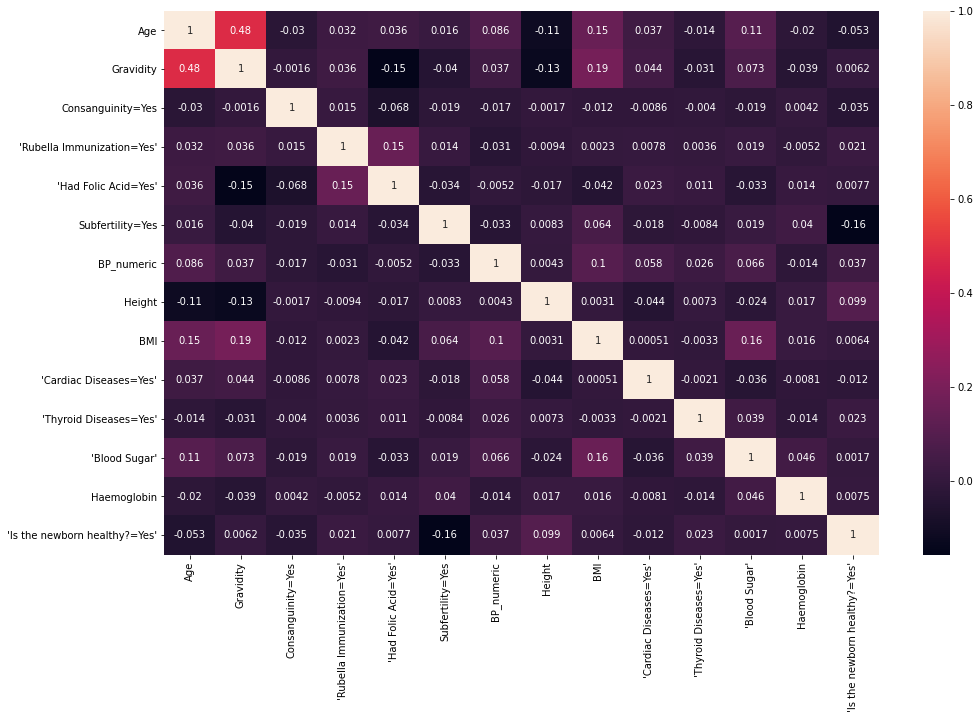

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(df7.corr(), annot=True)
plt.show()